In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('hotd.csv')
#df.columns = ['sentiment', 'tweets']

In [53]:
df.head()

,Unnamed: 0,tweets,time
0,0,burası🥹🤏🏻\n\n#RhaenyraTargaryen #HOTD https://...,2022-09-22 09:32:18+00:00
1,1,While deaths in #Houseofthedragon make you ner...,2022-09-22 09:30:13+00:00
2,2,me whenever caraxes noodle boi appears on scre...,2022-09-22 09:28:33+00:00
3,3,Je pense qu’au prochain épisode là 😮‍💨\n#House...,2022-09-22 09:26:15+00:00
4,4,THE GORGEOUS LAENA VELARYON ❤\n#HOUSEOFTHEDRAG...,2022-09-22 09:22:58+00:00


In [54]:
df.columns

Index(['Unnamed: 0', 'tweets', 'time'], dtype='object')

In [55]:
df.dtypes

Unnamed: 0     int64
tweets        object
time          object
dtype: object

In [57]:
import neattext.functions as nfx

In [58]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [59]:
df['text_cleaned'] = df['tweets'].apply(nfx.remove_hashtags)

In [60]:
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: nfx.remove_userhandles(x))

In [61]:
df['text_cleaned'] = df['text_cleaned'].apply(nfx.remove_multiple_spaces)

In [62]:
df['text_cleaned'] = df['text_cleaned'].apply(nfx.remove_urls)

In [63]:
df['text_cleaned'] = df['text_cleaned'].apply(nfx.remove_puncts)

In [64]:
df['text_cleaned'] = df['text_cleaned'].apply(nfx.remove_emojis)

In [65]:
df[['text_cleaned','tweets']]

,text_cleaned,tweets
0,burası🥹🤏,burası🥹🤏🏻\n\n#RhaenyraTargaryen #HOTD https://...
1,While deaths in make you nervous here are char...,While deaths in #Houseofthedragon make you ner...
2,me whenever caraxes noodle boi appears on scre...,me whenever caraxes noodle boi appears on scre...
3,Je pense qu’au prochain épisode là ‍,Je pense qu’au prochain épisode là 😮‍💨\n#House...
4,THE GORGEOUS LAENA VELARYON,THE GORGEOUS LAENA VELARYON ❤\n#HOUSEOFTHEDRAG...
...,...,...
995,At the time of the Dance do you think was more...,"At the time of the Dance, do you think #HouseH..."
996,Lo que viene,Lo que viene 😲😲😲😲😲\n#HOTD https://t.co/DcYsZeyBNa
997,So Alicent has the audacity to demand Rhaenyra...,So Alicent has the audacity to demand Rhaenyra...
998,Nah Because we need to talk about Rhaenyras Ch...,Nah Because we need to talk about Rhaenyra's C...


In [66]:
from textblob import TextBlob

In [67]:
def get_sen(text):
    blob = TextBlob(text)
    sentiment_polraity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polraity > 0:
        sentiment_label = 'positive'
    elif sentiment_polraity <0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    result = sentiment_label
    return result 

In [68]:
ex = df['text_cleaned'].iloc[0]

In [69]:
get_sen(ex)

'neutral'

In [70]:
df['sentiment'] = df['text_cleaned'].apply(get_sen)

In [71]:
df['sentiment'] 

0       neutral
1       neutral
2      positive
3       neutral
4      positive
         ...   
995    positive
996     neutral
997     neutral
998    positive
999     neutral
Name: sentiment, Length: 1000, dtype: object

In [72]:
df.head()

,Unnamed: 0,tweets,time,text_cleaned,sentiment
0,0,burası🥹🤏🏻\n\n#RhaenyraTargaryen #HOTD https://...,2022-09-22 09:32:18+00:00,burası🥹🤏,neutral
1,1,While deaths in #Houseofthedragon make you ner...,2022-09-22 09:30:13+00:00,While deaths in make you nervous here are char...,neutral
2,2,me whenever caraxes noodle boi appears on scre...,2022-09-22 09:28:33+00:00,me whenever caraxes noodle boi appears on scre...,positive
3,3,Je pense qu’au prochain épisode là 😮‍💨\n#House...,2022-09-22 09:26:15+00:00,Je pense qu’au prochain épisode là ‍,neutral
4,4,THE GORGEOUS LAENA VELARYON ❤\n#HOUSEOFTHEDRAG...,2022-09-22 09:22:58+00:00,THE GORGEOUS LAENA VELARYON,positive


<AxesSubplot:>

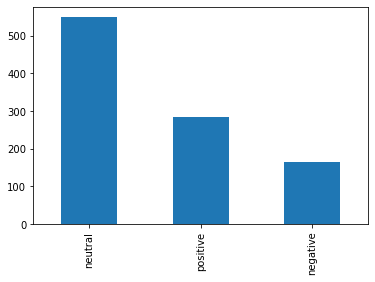

In [74]:
df['sentiment'].value_counts().plot(kind='bar')

In [75]:
pos_tweet = df[df['sentiment'] == 'positive']['text_cleaned']
neg_tweet = df[df['sentiment'] == 'negative']['text_cleaned']
neu_tweet = df[df['sentiment'] == 'neutral']['text_cleaned']

In [76]:
pos_tweet = pos_tweet.apply(nfx.remove_stopwords).tolist()
neg_tweet = neg_tweet.apply(nfx.remove_stopwords).tolist()
neu_tweet = neu_tweet.apply(nfx.remove_stopwords).tolist()

In [77]:
pos_tokens = [token for line in pos_tweet for token in line.split()]
neg_tokens = [token for line in neg_tweet for token in line.split()]
neu_tokens = [token for line in neu_tweet for token in line.split()]

In [78]:
from collections import Counter 

In [79]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [80]:
most_pos = get_tokens(pos_tokens)
most_neg = get_tokens(neg_tokens)
most_neu = get_tokens(neu_tokens)

In [81]:
df_neg = pd.DataFrame(most_neg.items(),columns=['words','score'])

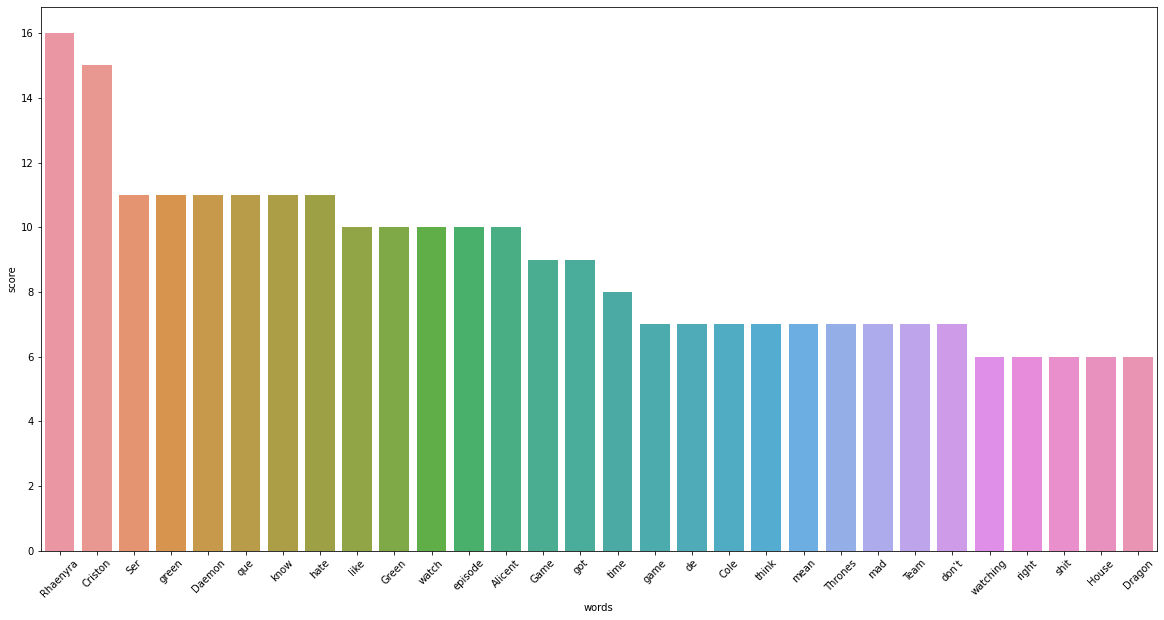

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='score', data = df_neg)
plt.xticks(rotation=45)
plt.show()

In [83]:
df_pos = pd.DataFrame(most_pos.items(),columns=['words','score'])

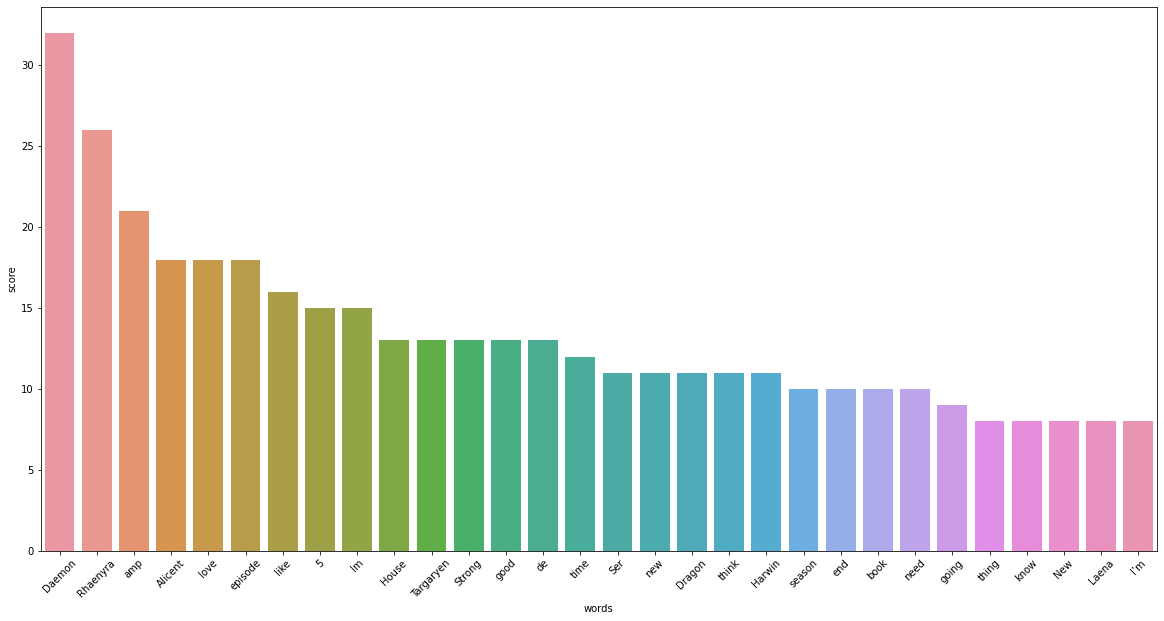

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='score', data = df_pos)
plt.xticks(rotation=45)
plt.show()

In [85]:
df_neu = pd.DataFrame(most_neu.items(),columns=['words','score'])

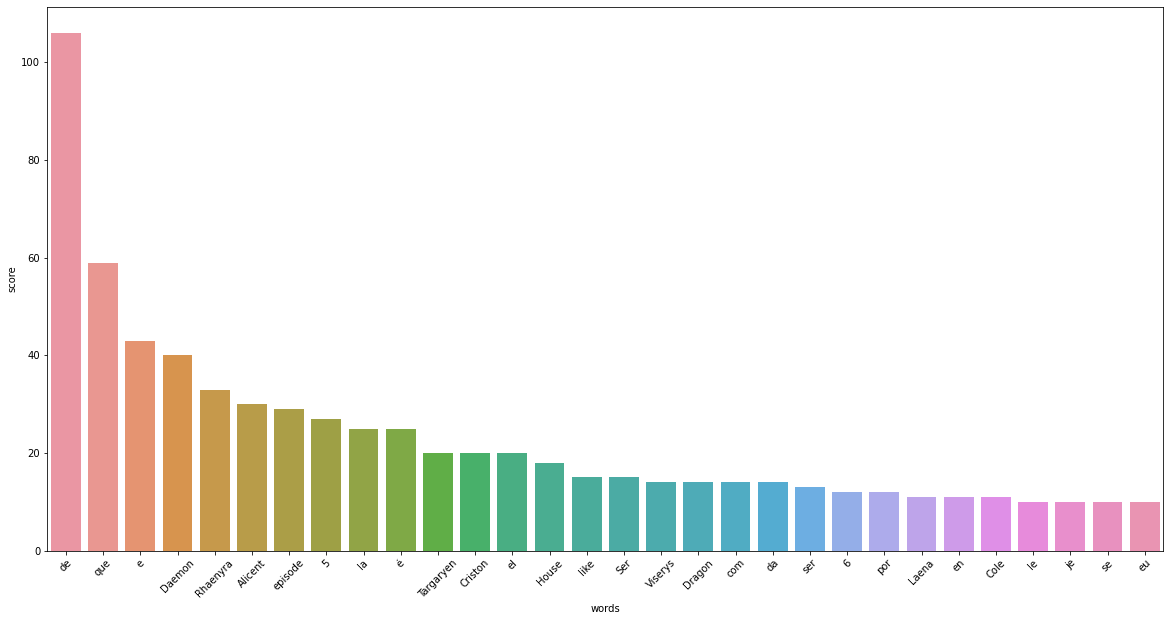

In [86]:
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='score', data = df_neu)
plt.xticks(rotation=45)
plt.show()

In [91]:
from wordcloud import WordCloud

def plot_wc(docx):
    plt.figure(figsize=(20,10))
    mywc = WordCloud(background_color='white').generate(docx)
    plt.imshow(mywc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [92]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neu_tokens)

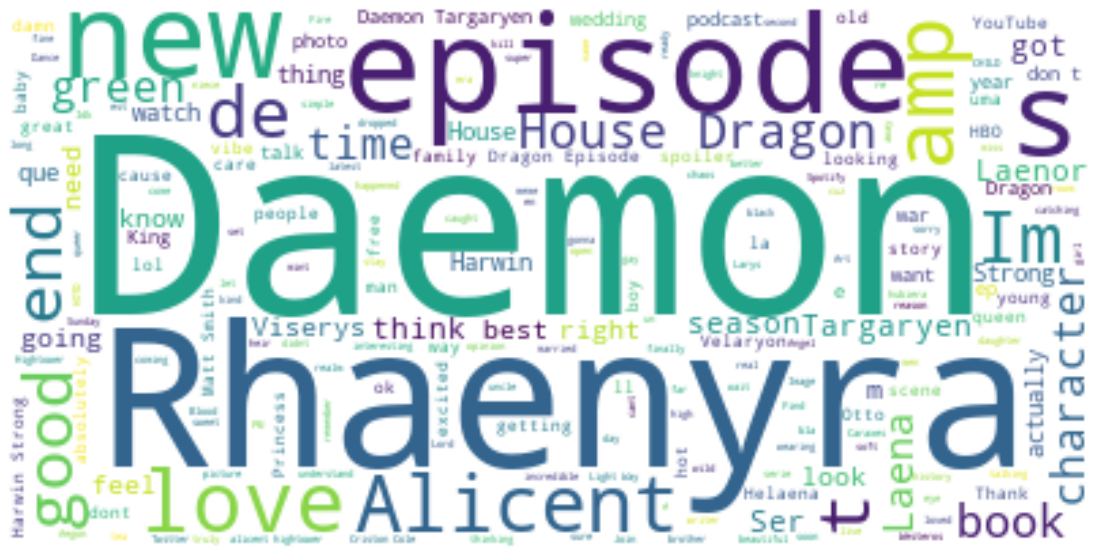

In [93]:
plot_wc(pos_docx)

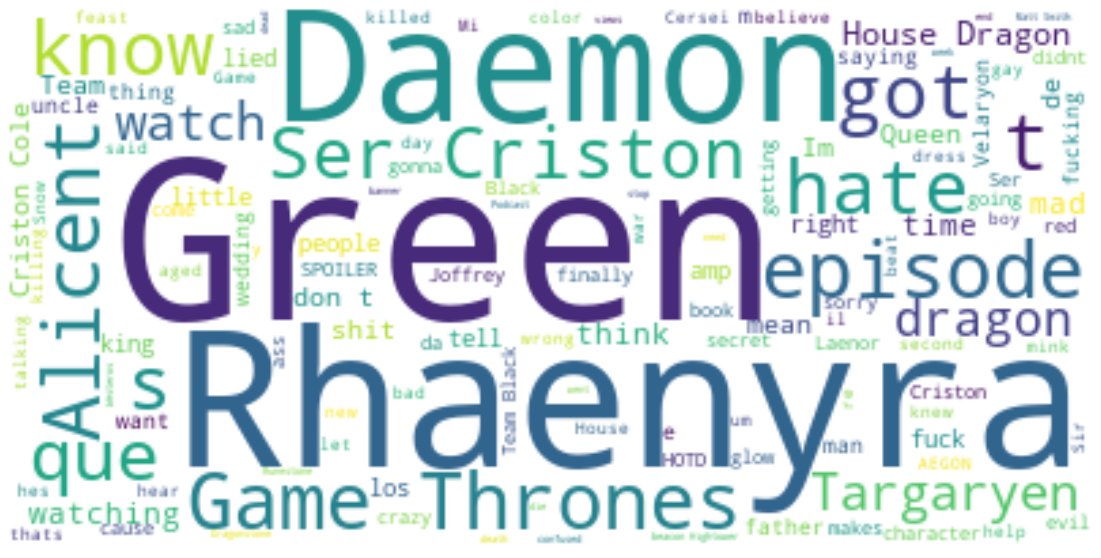

In [94]:
plot_wc(neg_docx)

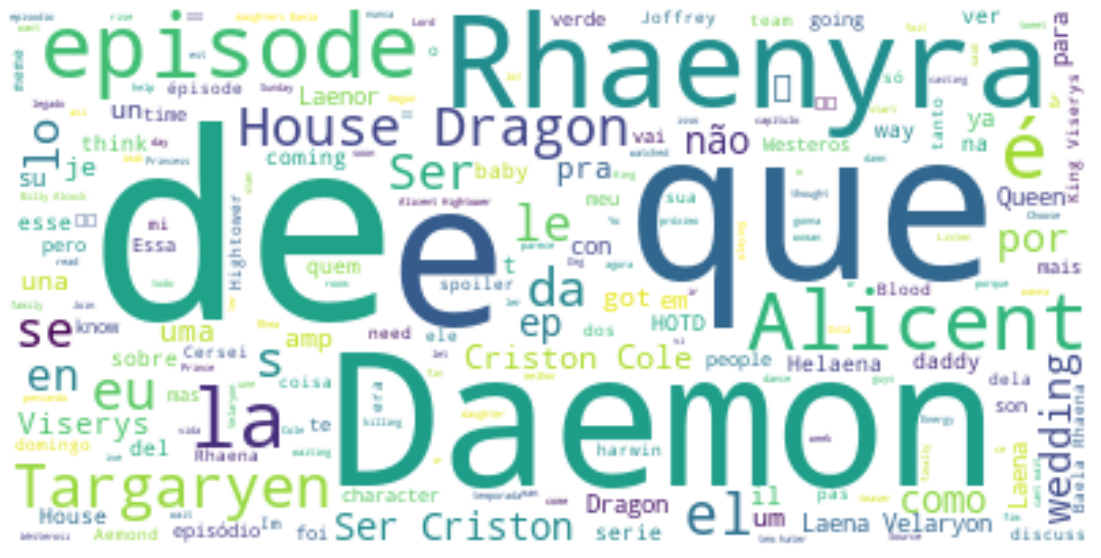

In [95]:
plot_wc(neu_docx)